<a href="https://colab.research.google.com/github/younesA99/svm/blob/main/Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
import pandas as pd

# Charger le fichier Excel
file_path = 'Concrete_Data.xls'  # Remplacez par le chemin de votre fichier
data_vi = pd.read_excel(file_path)

# Renommer les colonnes
new_column_names = {
   'Cement (component 1)(kg in a m^3 mixture)': 'Cement (kg/m³)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag (kg/m³)',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh (kg/m³)',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water (kg/m³)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer (kg/m³)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CoarseAggr (kg/m³)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'FineAggr (kg/m³)',
    'Age (day)': 'Age (day)',
    'Concrete compressive strength Mpa': 'Strength (MPa)'
}

data_vi.rename(columns=new_column_names, inplace=True)

# Afficher les premières lignes du DataFrame pour vérifier le changement
print(data_vi.head())


   Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
0           540.0           0.0             0.0          162.0   
1           540.0           0.0             0.0          162.0   
2           332.5         142.5             0.0          228.0   
3           332.5         142.5             0.0          228.0   
4           198.6         132.4             0.0          192.0   

   Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  Age (day)  \
0                       2.5              1040.0             676.0         28   
1                       2.5              1055.0             676.0         28   
2                       0.0               932.0             594.0        270   
3                       0.0               932.0             594.0        365   
4                       0.0               978.4             825.5        360   

   Strength (MPa)  
0       79.986111  
1       61.887366  
2       40.269535  
3       41.052780  
4       44.296075  


In [5]:
import pandas as pd

# Charger le fichier Excel
file_path = 'Concrete_Data.xls'  # Remplacez par le chemin de votre fichier
data = pd.read_excel(file_path)

# Afficher les noms des colonnes actuels pour référence
print("Noms des colonnes avant le renommage :", data.columns)

# Renommer les colonnes
new_column_names = {
    'Cement (component 1)(kg in a m^3 mixture)': 'Cement (kg/m³)',
    'Blast Furnace Slag (component 2)(kg in a m^3 mixture)': 'Slag (kg/m³)',
    'Fly Ash (component 3)(kg in a m^3 mixture)': 'FlyAsh (kg/m³)',
    'Water  (component 4)(kg in a m^3 mixture)': 'Water (kg/m³)',
    'Superplasticizer (component 5)(kg in a m^3 mixture)': 'Superplasticizer (kg/m³)',
    'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'CoarseAggr (kg/m³)',
    'Fine Aggregate (component 7)(kg in a m^3 mixture)': 'FineAggr (kg/m³)',
    'Age (day)': 'Age (day)',
    'Concrete compressive strength Mpa': 'Strength (MPa)'
}

data.rename(columns=new_column_names, inplace=True)

# Calculer les nouvelles colonnes
data['W/C'] = data['Water (kg/m³)'] / data['Cement (kg/m³)']
data['G/S'] = data['CoarseAggr (kg/m³)'] / data['FineAggr (kg/m³)']

# Insérer les nouvelles colonnes avant la colonne 'Strength'
strength_index = data.columns.get_loc('Strength (MPa)')

# Réordonner les colonnes pour placer 'W/C' et 'G/S' avant 'Strength'
cols = data.columns.tolist()
cols.insert(strength_index, cols.pop(cols.index('W/C')))
cols.insert(strength_index, cols.pop(cols.index('G/S')))

data = data[cols]

# Afficher les premières lignes du DataFrame pour vérifier les changements
print(data.head())


Noms des colonnes avant le renommage : Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength Mpa'],
      dtype='object')
   Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
0           540.0           0.0             0.0          162.0   
1           540.0           0.0             0.0          162.0   
2           332.5         142.5             0.0          228.0   
3           332.5         142.5             0.0          228.0   
4           198.6         132.4             0.0          192.0   

   Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  Age (day)  

# ***DATA DESCRIPTION***

In [6]:
data.head(1030)

,Cement (kg/m³),Slag (kg/m³),FlyAsh (kg/m³),Water (kg/m³),Superplasticizer (kg/m³),CoarseAggr (kg/m³),FineAggr (kg/m³),Age (day),G/S,W/C,Strength (MPa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,1.538462,0.300000,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,1.560651,0.300000,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,1.569024,0.685714,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,1.569024,0.685714,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,1.185221,0.966767,44.296075
...,...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,1.132500,0.649783,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,1.005532,0.608318,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,1.144103,1.297643,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,1.254405,1.103708,32.768036


In [7]:
data.dtypes

Cement (kg/m³)              float64
Slag (kg/m³)                float64
FlyAsh (kg/m³)              float64
Water (kg/m³)               float64
Superplasticizer (kg/m³)    float64
CoarseAggr (kg/m³)          float64
FineAggr (kg/m³)            float64
Age (day)                     int64
G/S                         float64
W/C                         float64
Strength (MPa)              float64
dtype: object

In [8]:
data.shape

(1030, 11)

In [9]:
#Checking for missing values

data.isnull().sum()

Cement (kg/m³)              0
Slag (kg/m³)                0
FlyAsh (kg/m³)              0
Water (kg/m³)               0
Superplasticizer (kg/m³)    0
CoarseAggr (kg/m³)          0
FineAggr (kg/m³)            0
Age (day)                   0
G/S                         0
W/C                         0
Strength (MPa)              0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement (kg/m³),1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
Slag (kg/m³),1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
FlyAsh (kg/m³),1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water (kg/m³),1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer (kg/m³),1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAggr (kg/m³),1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggr (kg/m³),1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age (day),1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
G/S,1030.0,1.273754,0.185671,0.858453,1.121486,1.266055,1.358146,1.874876
W/C,1030.0,0.748269,0.314005,0.266893,0.533333,0.675349,0.935014,1.882353


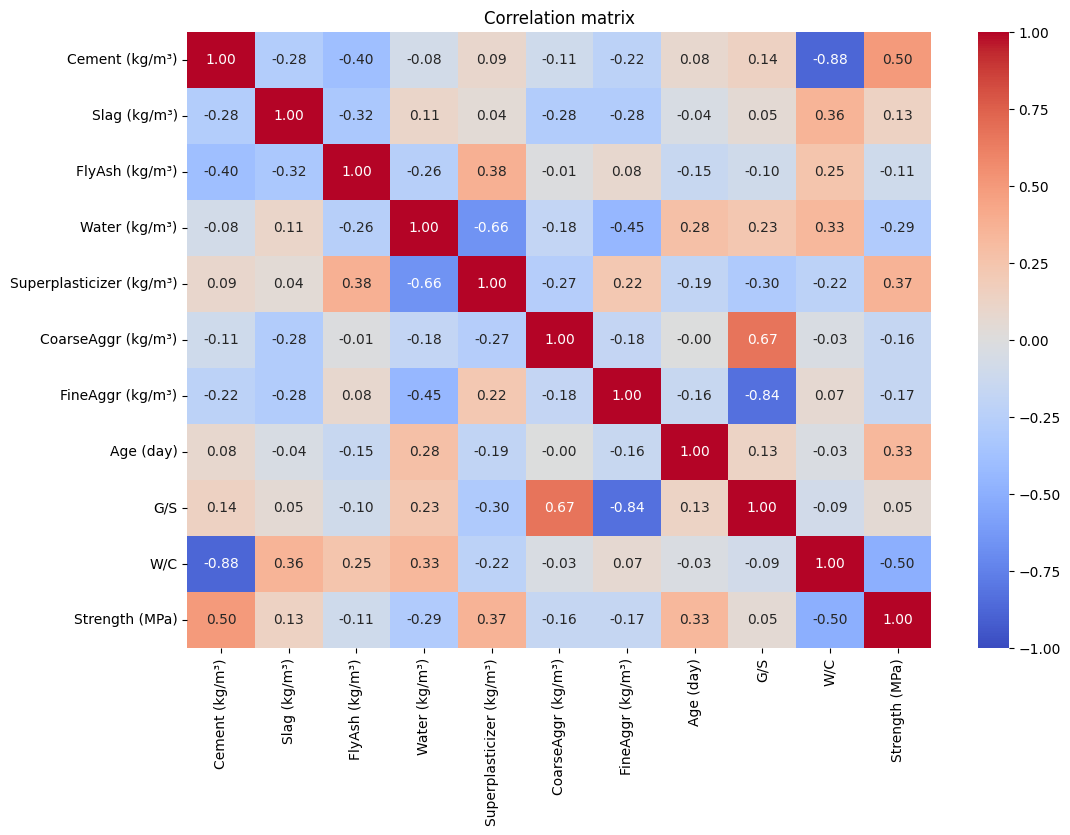

In [11]:
# Calculer la matrice de corrélation
corr_matrix = data.corr()

# Afficher la heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

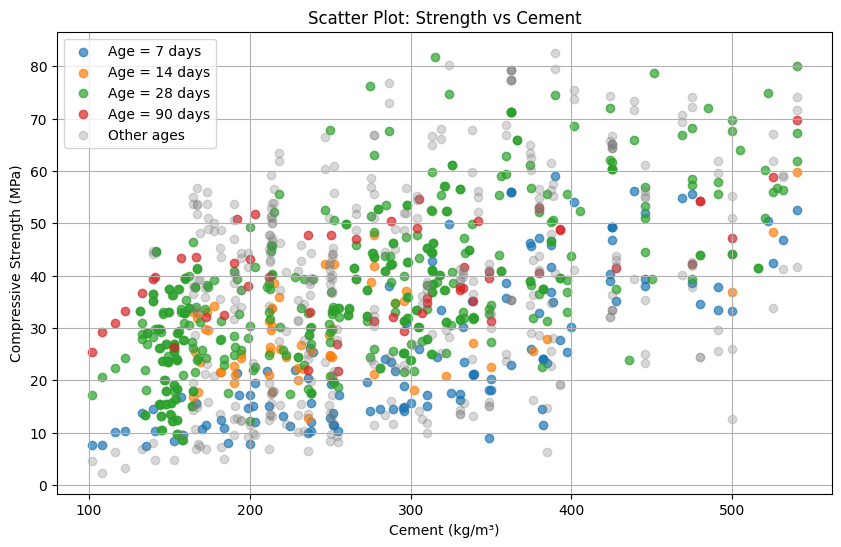

In [12]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Cement (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Cement (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Cement')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

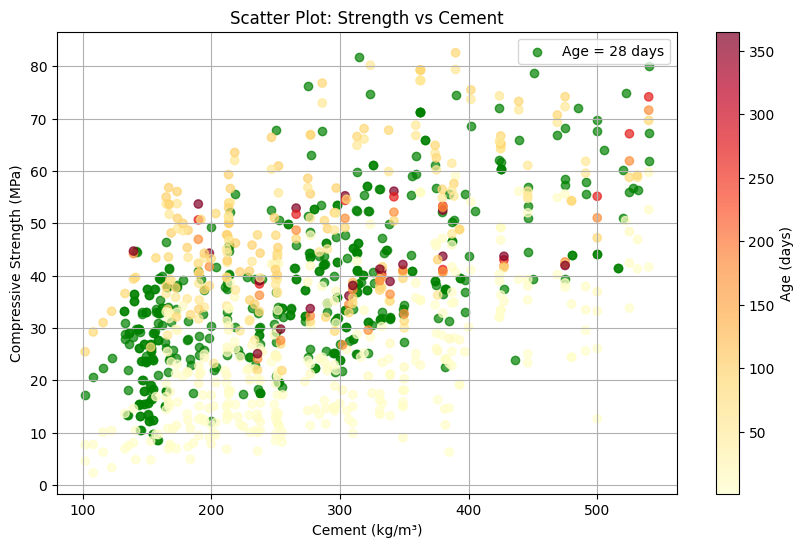

In [13]:
# Définir l'âge spécial pour la différenciation
special_age = 28

# Tracer le nuage de points avec des couleurs différentes pour l'âge spécial et les autres âges
plt.figure(figsize=(10, 6))

# Tracé pour l'âge 28 (en vert)
subset_special = data[data['Age (day)'] == special_age]
plt.scatter(subset_special['Cement (kg/m³)'], subset_special['Strength (MPa)'],
            label=f'Age = {special_age} days', alpha=0.7, color='green')

# Tracé pour les autres âges (heatmap avec l'âge comme couleur démarrant par le jaune foncé)
other_ages = data[data['Age (day)'] != special_age]
plt.scatter(other_ages['Cement (kg/m³)'], other_ages['Strength (MPa)'],
            c=other_ages['Age (day)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Strength vs Cement')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.colorbar(label='Age (days)', orientation='vertical')
plt.show()

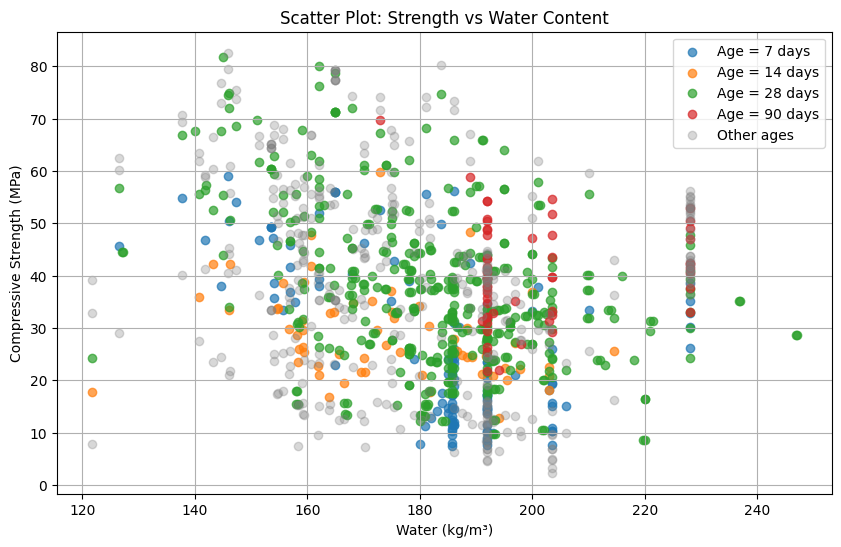

In [14]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Water (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Water (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Water Content')
plt.xlabel('Water (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

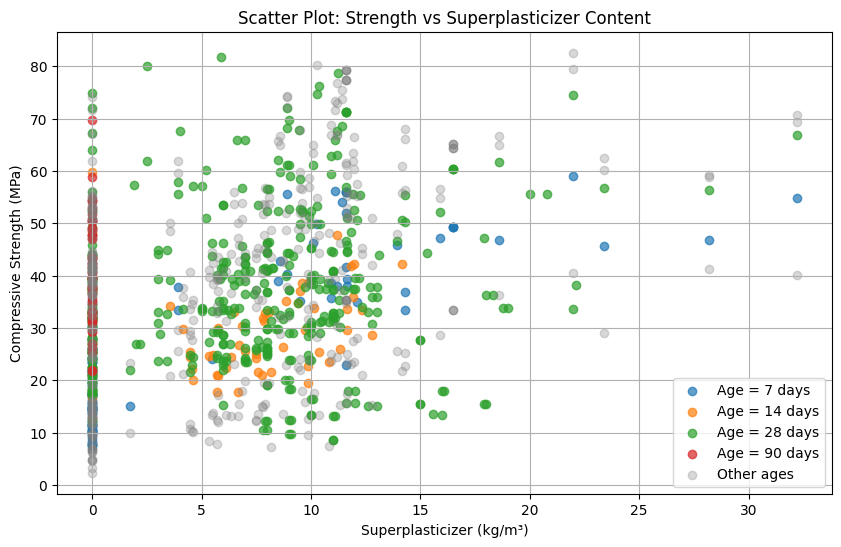

In [15]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['Superplasticizer (kg/m³)'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['Superplasticizer (kg/m³)'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs Superplasticizer Content')
plt.xlabel('Superplasticizer (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

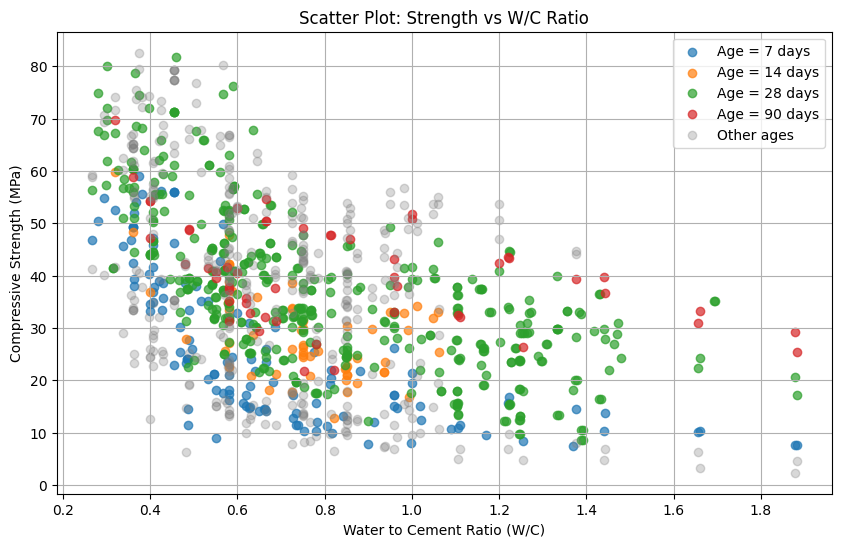

In [16]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['W/C'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['W/C'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs W/C Ratio')
plt.xlabel('Water to Cement Ratio (W/C)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

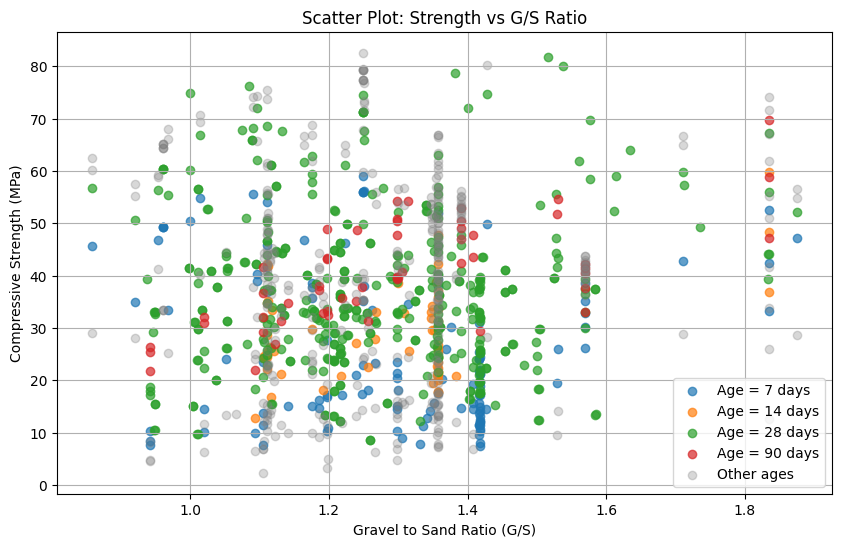

In [17]:
# Define special ages to differentiate
special_ages = [7, 14, 28, 90]

# Scatter plot with different colors for special ages
plt.figure(figsize=(10, 6))
for age in special_ages:
    subset = data[data['Age (day)'] == age]
    plt.scatter(subset['G/S'], subset['Strength (MPa)'],
                label=f'Age = {age} days', alpha=0.7)

# Points for other ages
other_ages = data[~data['Age (day)'].isin(special_ages)]
plt.scatter(other_ages['G/S'], other_ages['Strength (MPa)'],
            color='gray', label='Other ages', alpha=0.3)

plt.title('Scatter Plot: Strength vs G/S Ratio')
plt.xlabel('Gravel to Sand Ratio (G/S)')
plt.ylabel('Compressive Strength (MPa)')
plt.legend()
plt.grid(True)
plt.show()

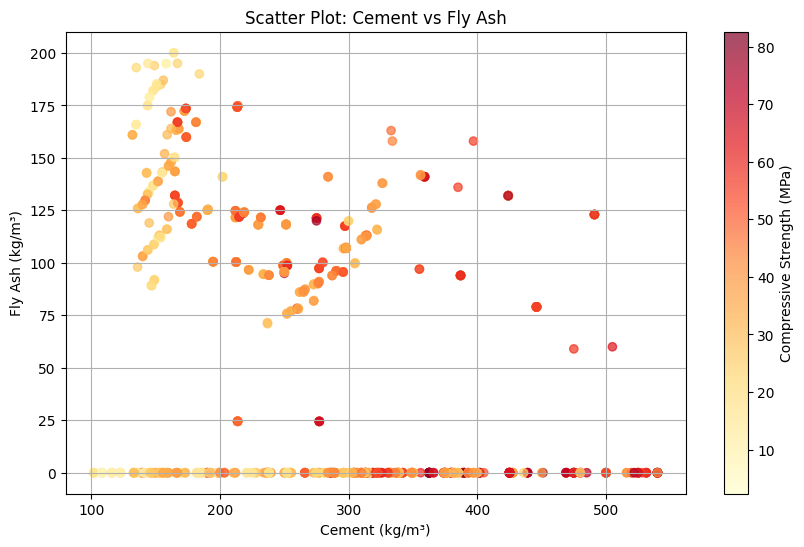

In [18]:
# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data['Cement (kg/m³)'], data['FlyAsh (kg/m³)'],
            c=data['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Cement vs Fly Ash')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Fly Ash (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

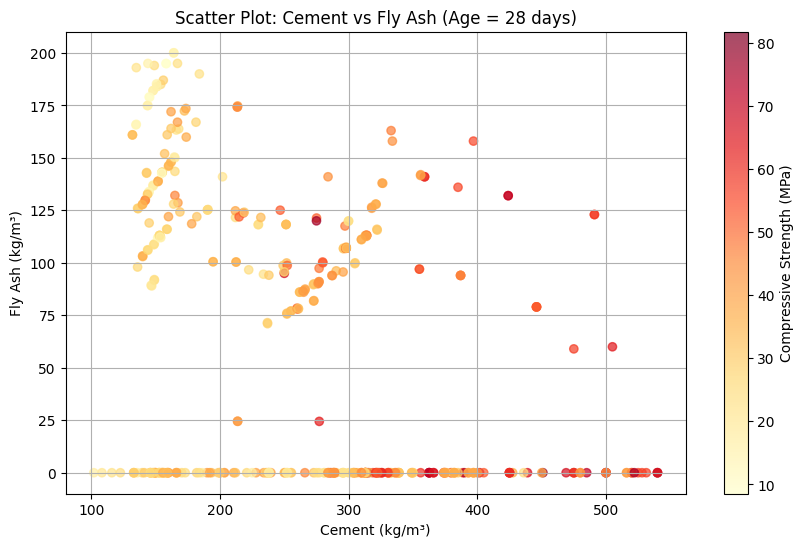

In [19]:
# Filtrer les données pour l'âge égal à 28 jours
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['FlyAsh (kg/m³)'],
            c=data_age_28['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Scatter Plot: Cement vs Fly Ash (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Fly Ash (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

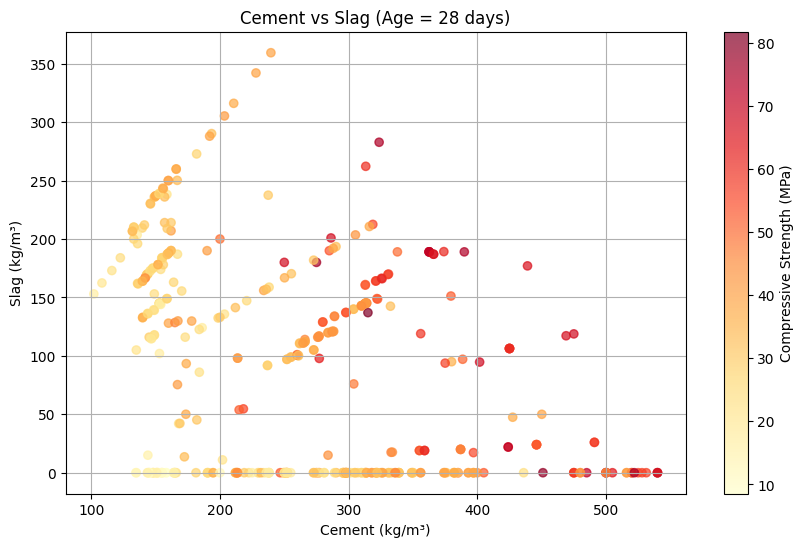

In [20]:
# Filtrer les données pour l'âge égal à 28 jours
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec un dégradé de couleur pour la résistance
plt.figure(figsize=(10, 6))

plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Slag (kg/m³)'],
            c=data_age_28['Strength (MPa)'], cmap='YlOrRd', alpha=0.7)

plt.title('Cement vs Slag (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Slag (kg/m³)')
plt.colorbar(label='Compressive Strength (MPa)', orientation='vertical')
plt.grid(True)
plt.show()

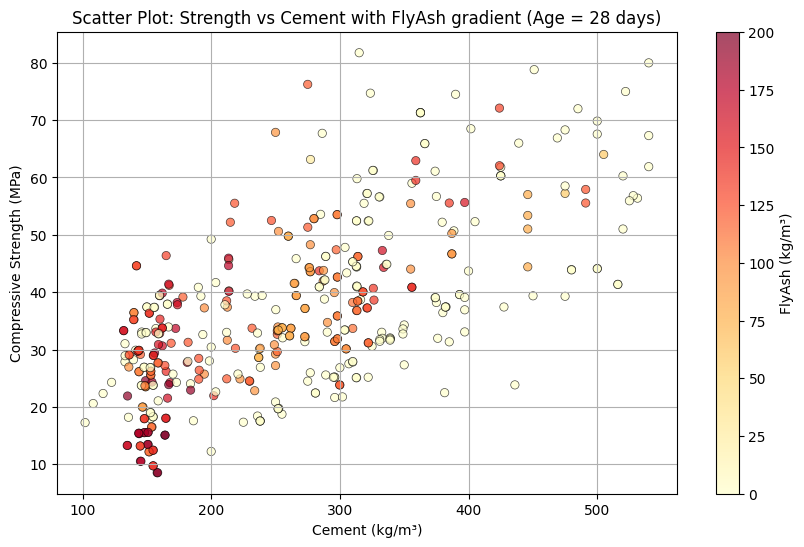

In [21]:

# Filtrer les données pour age = 28
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec dégradation de couleur pour FlyAsh
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Strength (MPa)'],
                      c=data_age_28['FlyAsh (kg/m³)'],
                      cmap='YlOrRd', alpha=0.7, edgecolors='k', linewidths=0.5)

plt.title('Scatter Plot: Strength vs Cement with FlyAsh gradient (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.colorbar(scatter, label='FlyAsh (kg/m³)', orientation='vertical')
plt.grid(True)
plt.show()

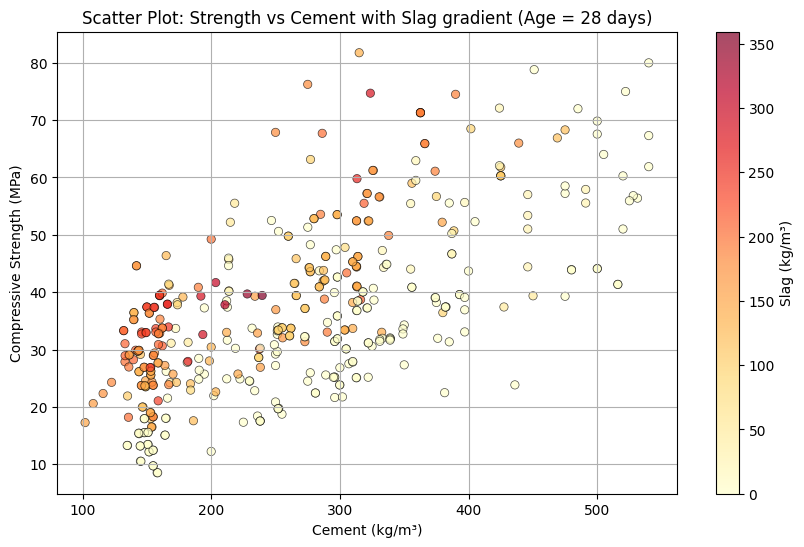

In [22]:
# Filtrer les données pour age = 28
data_age_28 = data[data['Age (day)'] == 28]

# Tracer le nuage de points avec dégradation de couleur pour Slag
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_age_28['Cement (kg/m³)'], data_age_28['Strength (MPa)'],
                      c=data_age_28['Slag (kg/m³)'],
                      cmap='YlOrRd', alpha=0.7, edgecolors='k', linewidths=0.5)

plt.title('Scatter Plot: Strength vs Cement with Slag gradient (Age = 28 days)')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.colorbar(scatter, label='Slag (kg/m³)', orientation='vertical')
plt.grid(True)
plt.show()

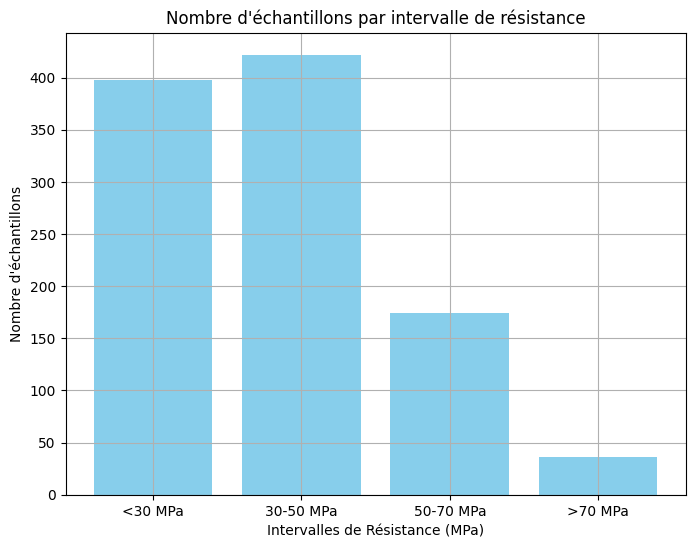

In [23]:
# Définir les intervalles de résistance
bins = [0, 30, 50, 70, float('inf')]  # Les intervalles sont définis en MPa

# Calculer l'histogramme des échantillons par intervalle de résistance
hist, bins = np.histogram(data['Strength (MPa)'], bins=bins)

# Tracer l'histogramme
plt.figure(figsize=(8, 6))
plt.bar(['<30 MPa', '30-50 MPa', '50-70 MPa', '>70 MPa'], hist, color='skyblue')
plt.xlabel('Intervalles de Résistance (MPa)')
plt.ylabel('Nombre d\'échantillons')
plt.title('Nombre d\'échantillons par intervalle de résistance')
plt.grid(True)
plt.show()

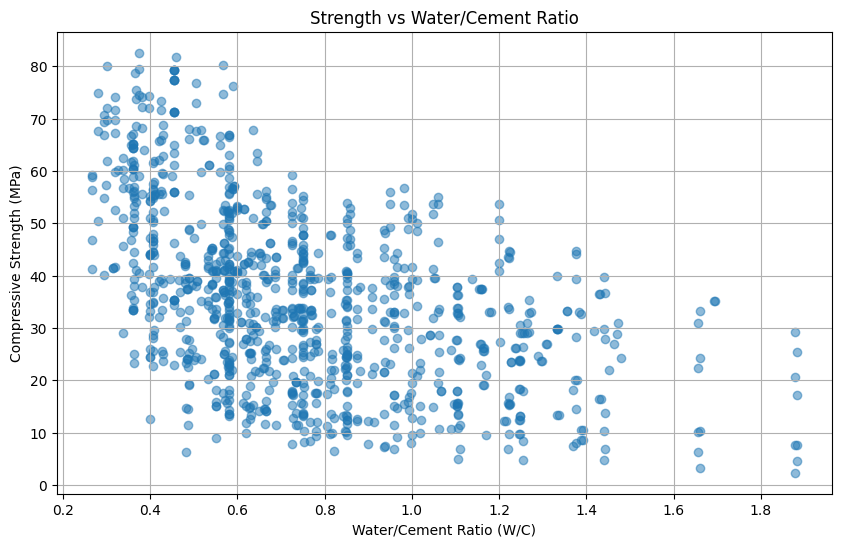

In [24]:
# Tracer le scatter plot Strength vs W/C
plt.figure(figsize=(10, 6))
plt.scatter(data['W/C'], data['Strength (MPa)'], alpha=0.5)
plt.title('Strength vs Water/Cement Ratio')
plt.xlabel('Water/Cement Ratio (W/C)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

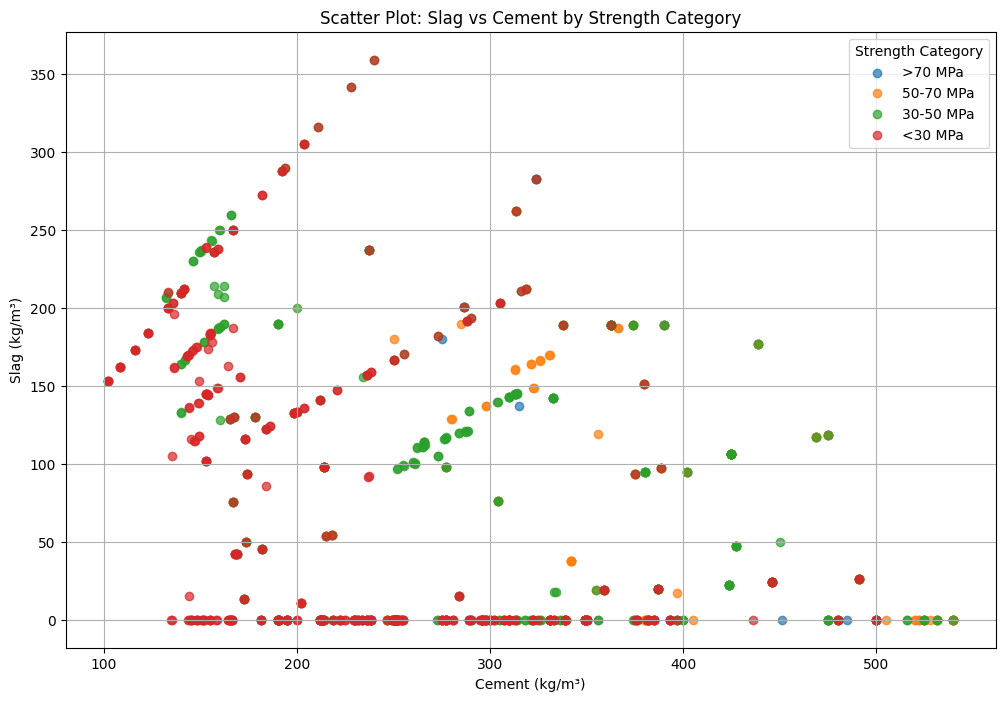

In [25]:
# Définir les intervalles de résistance
bins = [0, 30, 50, 70, float('inf')]  # Les intervalles sont définis en MPa

# Ajouter une nouvelle colonne avec les catégories d'intervalle
data['Strength Category'] = pd.cut(data['Strength (MPa)'], bins=bins,
                                   labels=['<30 MPa', '30-50 MPa', '50-70 MPa', '>70 MPa'])

# Tracer des scatter plots pour chaque intervalle de résistance
plt.figure(figsize=(12, 8))

for category in data['Strength Category'].unique():
    subset = data[data['Strength Category'] == category]
    plt.scatter(subset['Cement (kg/m³)'], subset['Slag (kg/m³)'],
                label=category, alpha=0.7)

plt.title('Scatter Plot: Slag vs Cement by Strength Category')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Slag (kg/m³)')
plt.legend(title='Strength Category')
plt.grid(True)
plt.show()


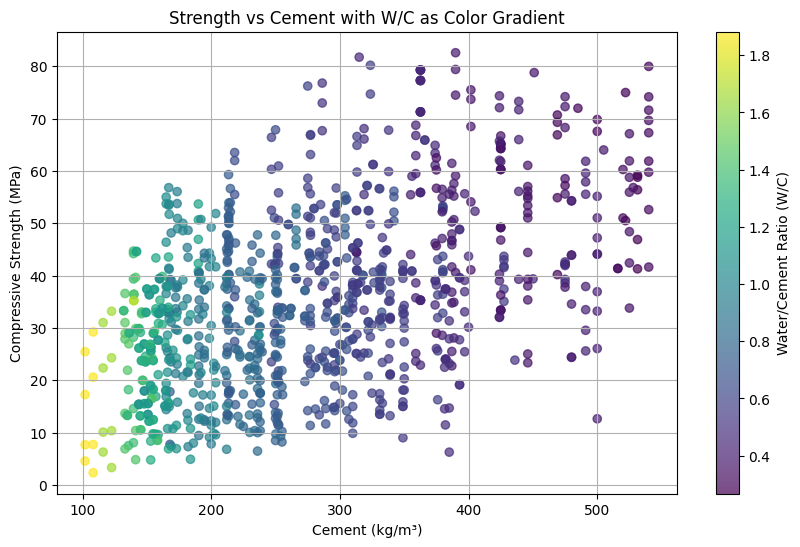

In [26]:
# Tracer le scatter plot Strength vs Cement avec couleur dégradée représentant W/C
plt.figure(figsize=(10, 6))
sc = plt.scatter(data['Cement (kg/m³)'], data['Strength (MPa)'], c=data['W/C'], cmap='viridis', alpha=0.7)
plt.colorbar(sc, label='Water/Cement Ratio (W/C)')
plt.title('Strength vs Cement with W/C as Color Gradient')
plt.xlabel('Cement (kg/m³)')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()


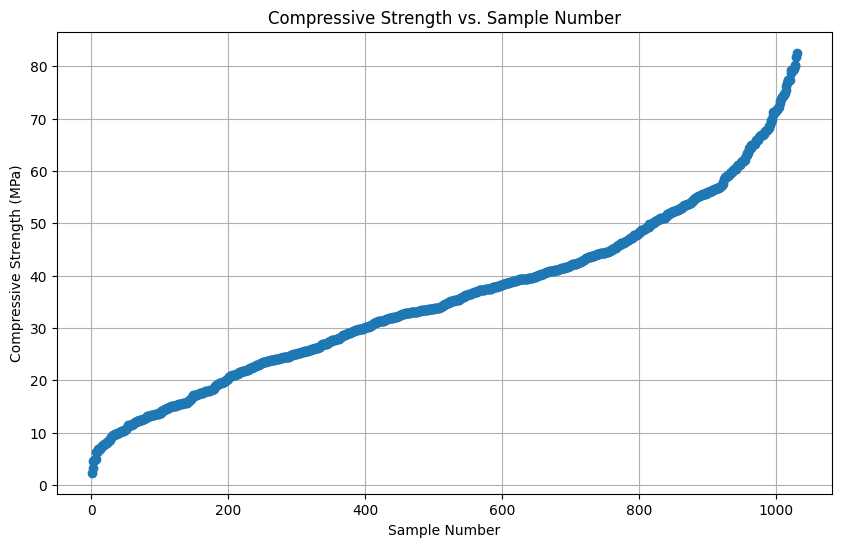

In [27]:
# Trier les données par résistance à la compression
data_sorted = data.sort_values(by='Strength (MPa)')

# Créer une colonne pour le numéro d'échantillon
data_sorted['Sample Number'] = range(1, len(data_sorted) + 1)

# Tracer la courbe
plt.figure(figsize=(10, 6))
plt.plot(data_sorted['Sample Number'], data_sorted['Strength (MPa)'], marker='o', linestyle='-')
plt.title('Compressive Strength vs. Sample Number')
plt.xlabel('Sample Number')
plt.ylabel('Compressive Strength (MPa)')
plt.grid(True)
plt.show()

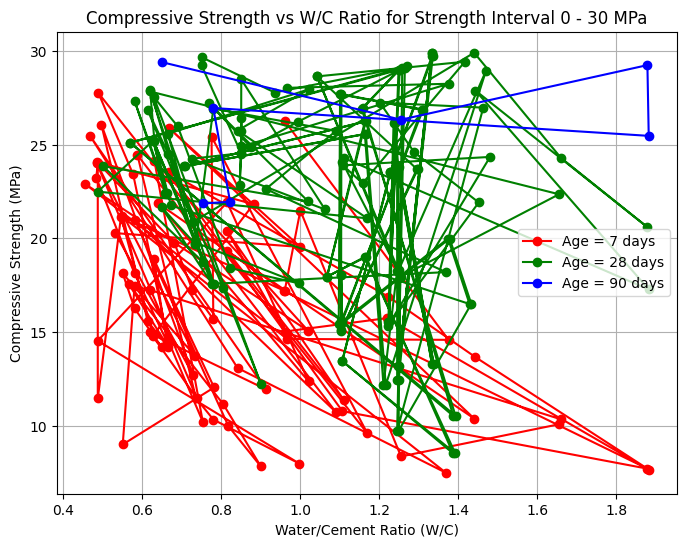

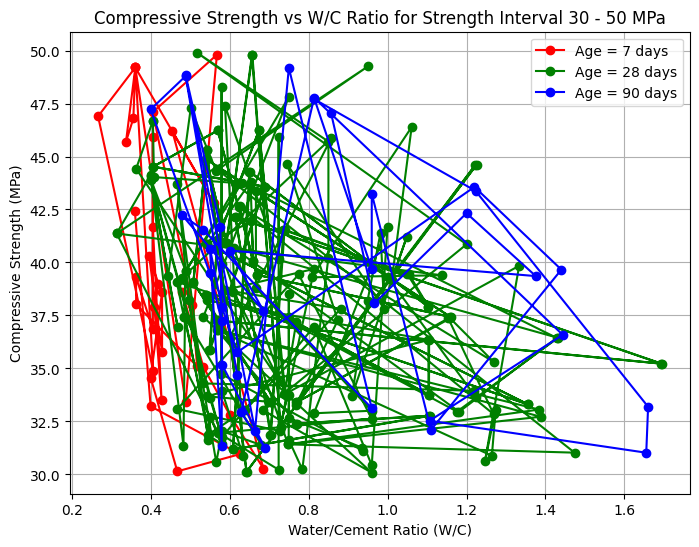

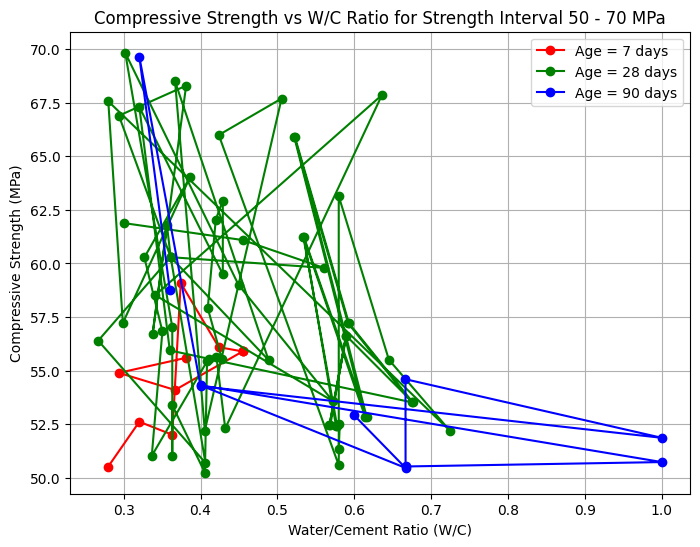

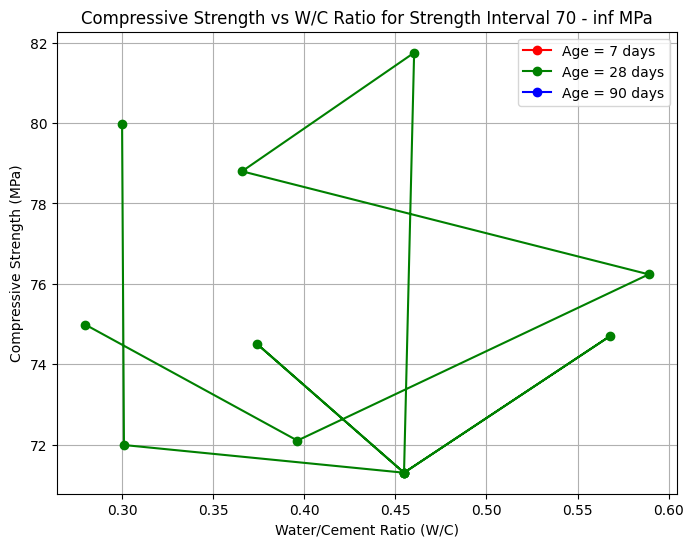

In [29]:
# Définir les intervalles de résistance
bins = [0, 30, 50, 70, float('inf')]  # Les intervalles sont définis en MPa

# Tracer les courbes pour chaque intervalle et pour les âges de 7, 28, et 90 jours
ages = [7, 28, 90]
age_colors = {7: 'red', 28: 'green', 90: 'blue'}

for i in range(len(bins) - 1):
    bin_data = data[(data['Strength (MPa)'] >= bins[i]) & (data['Strength (MPa)'] < bins[i + 1])]

    plt.figure(figsize=(8, 6))
    for age in ages:
        age_data = bin_data[bin_data['Age (day)'] == age]
        plt.plot(age_data['W/C'], age_data['Strength (MPa)'], marker='o', linestyle='-', color=age_colors[age], label=f'Age = {age} days')

    plt.xlabel('Water/Cement Ratio (W/C)')
    plt.ylabel('Compressive Strength (MPa)')
    plt.title(f'Compressive Strength vs W/C Ratio for Strength Interval {bins[i]} - {bins[i + 1]} MPa')
    plt.legend()
    plt.grid(True)
    plt.show()

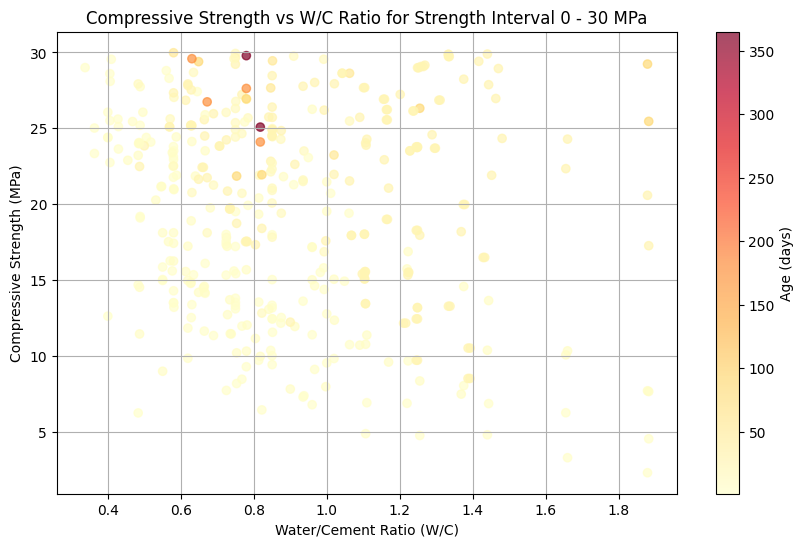

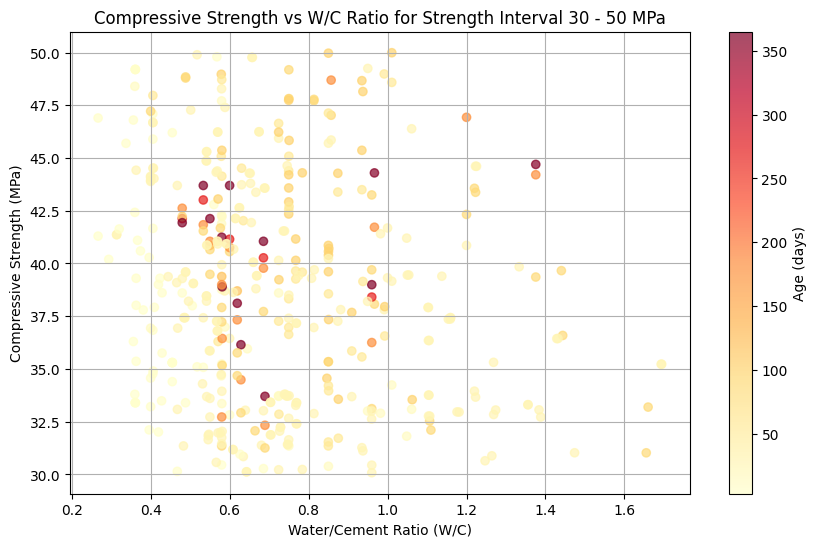

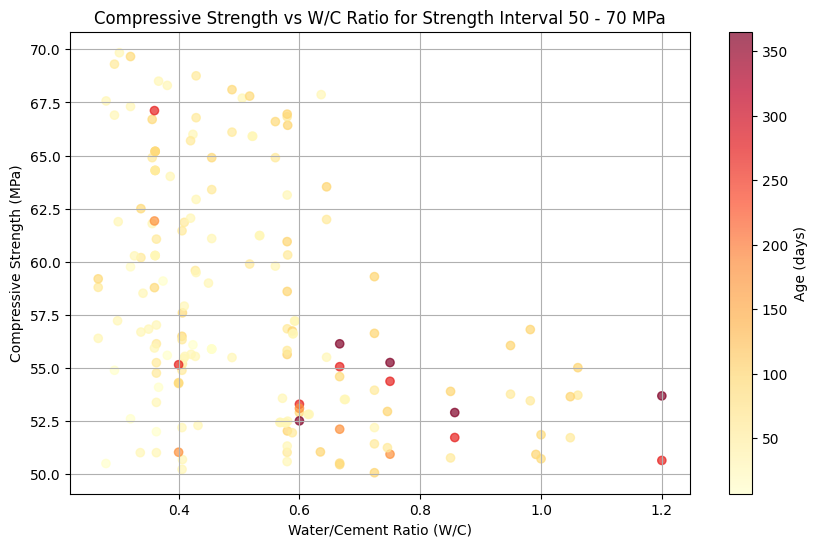

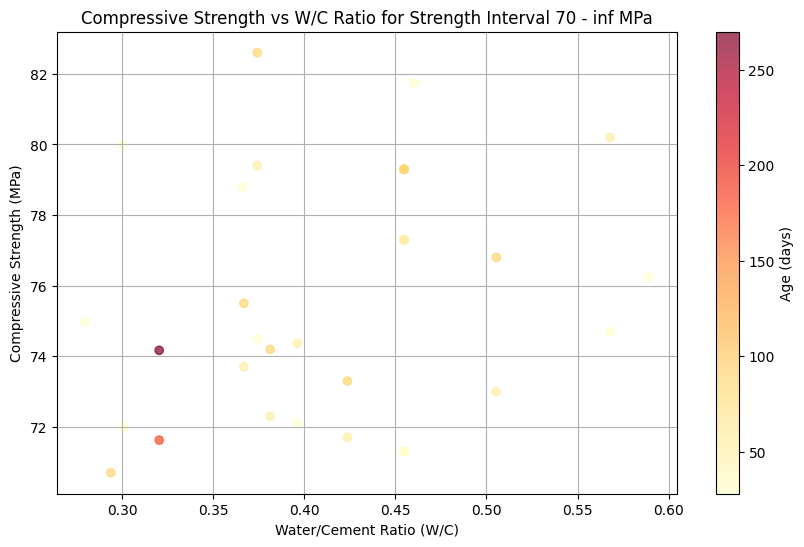

In [30]:
# Définir les intervalles de résistance
bins = [0, 30, 50, 70, float('inf')]  # Les intervalles sont définis en MPa

# Tracer les courbes pour chaque intervalle de résistance
for i in range(len(bins) - 1):
    bin_data = data[(data['Strength (MPa)'] >= bins[i]) & (data['Strength (MPa)'] < bins[i + 1])]

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(bin_data['W/C'], bin_data['Strength (MPa)'], c=bin_data['Age (day)'], cmap='YlOrRd', alpha=0.7)
    plt.colorbar(scatter, label='Age (days)')

    plt.xlabel('Water/Cement Ratio (W/C)')
    plt.ylabel('Compressive Strength (MPa)')
    plt.title(f'Compressive Strength vs W/C Ratio for Strength Interval {bins[i]} - {bins[i + 1]} MPa')
    plt.grid(True)
    plt.show()

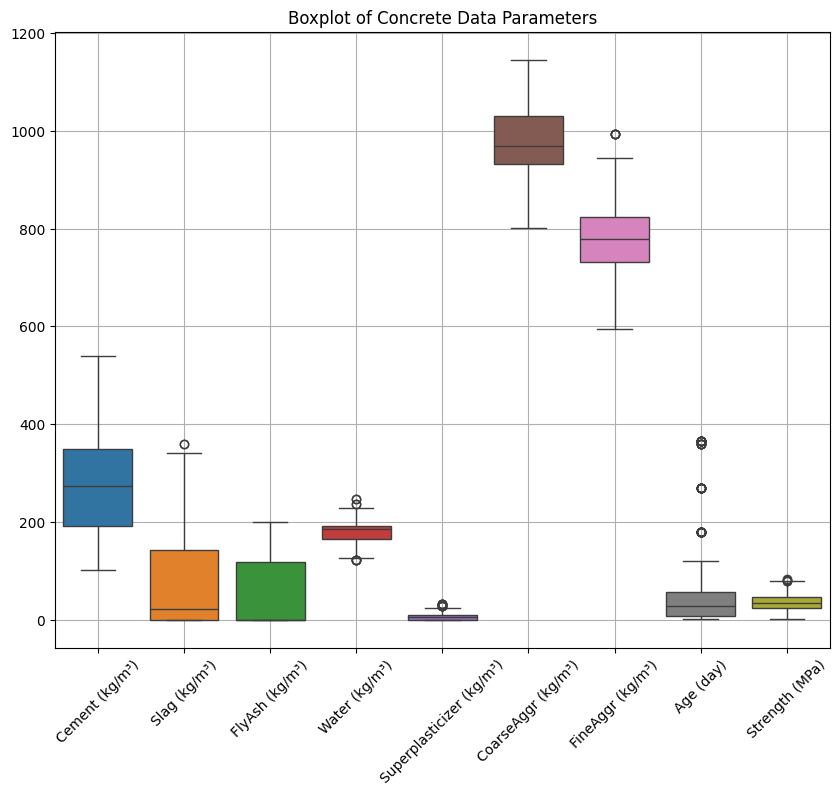

In [34]:
# Sélectionner les colonnes pour le boxplot
columns_to_plot = ['Cement (kg/m³)', 'Slag (kg/m³)', 'FlyAsh (kg/m³)', 'Water (kg/m³)',
                   'Superplasticizer (kg/m³)', 'CoarseAggr (kg/m³)', 'FineAggr (kg/m³)',
                   'Age (day)', 'Strength (MPa)',]

# Tracer le boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=data[columns_to_plot])
plt.xticks(rotation=45)
plt.title('Boxplot of Concrete Data Parameters')
plt.grid(True)
plt.show()

In [37]:
# Sélectionner les colonnes à vérifier pour les outliers
columns_to_check = ['Cement (kg/m³)', 'Slag (kg/m³)', 'FlyAsh (kg/m³)', 'Water (kg/m³)',
                    'Superplasticizer (kg/m³)', 'CoarseAggr (kg/m³)', 'FineAggr (kg/m³)',
                    'Age (day)', 'Strength (MPa)', 'W/C', 'G/S']

# Détecter les outliers pour chaque colonne
outliers = {}
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Afficher les outliers détectés
for column, outlier_data in outliers.items():
    print(f"Outliers in {column}:\n", outlier_data)

Outliers in Cement (kg/m³):
 Empty DataFrame
Columns: [Cement (kg/m³), Slag (kg/m³), FlyAsh (kg/m³), Water (kg/m³), Superplasticizer (kg/m³), CoarseAggr (kg/m³), FineAggr (kg/m³), Age (day), G/S, W/C, Strength (MPa), Strength Category]
Index: []
Outliers in Slag (kg/m³):
      Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
553           239.6         359.4             0.0          185.7   
559           239.6         359.4             0.0          185.7   

     Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  \
553                       0.0               941.6             664.3   
559                       0.0               941.6             664.3   

     Age (day)       G/S       W/C  Strength (MPa) Strength Category  
553          7  1.417432  0.775042       25.422359           <30 MPa  
559         28  1.417432  0.775042       39.435269         30-50 MPa  
Outliers in FlyAsh (kg/m³):
 Empty DataFrame
Columns: [Cement (kg/m³), Slag (kg/m³), FlyAsh (kg

In [38]:
from scipy.stats import zscore

# Calculer le Z-score pour chaque colonne
z_scores = data[columns_to_check].apply(zscore)

# Détecter les outliers (valeurs absolues de Z-score > 3)
outliers_zscore = (z_scores.abs() > 3).any(axis=1)

# Afficher les outliers détectés
outliers_data = data[outliers_zscore]
print("Outliers detected using Z-score method:\n", outliers_data)

Outliers detected using Z-score method:
       Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
2              332.5         142.5             0.0          228.0   
3              332.5         142.5             0.0          228.0   
4              198.6         132.4             0.0          192.0   
6              380.0          95.0             0.0          228.0   
12             427.5          47.5             0.0          228.0   
...              ...           ...             ...            ...   
820            525.0           0.0             0.0          189.0   
862            140.0         164.0           128.0          237.0   
873            237.0          92.0            71.0          247.0   
936            236.9          91.7            71.5          246.9   
1019           139.7         163.9           127.7          236.7   

      Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  \
2                          0.0               932.0        

In [39]:
# Sélectionner les colonnes à vérifier pour les outliers
columns_to_check = ['Cement (kg/m³)', 'Slag (kg/m³)', 'FlyAsh (kg/m³)', 'Water (kg/m³)',
                    'Superplasticizer (kg/m³)', 'CoarseAggr (kg/m³)', 'FineAggr (kg/m³)',
                    'Age (day)', 'Strength (MPa)', 'W/C', 'G/S']

# Détecter les outliers pour chaque colonne
outliers = {}
outliers_count = {}

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_count[column] = outliers[column].shape[0]

# Afficher le nombre de valeurs aberrantes pour chaque colonne
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")

Cement (kg/m³): 0 outliers
Slag (kg/m³): 2 outliers
FlyAsh (kg/m³): 0 outliers
Water (kg/m³): 9 outliers
Superplasticizer (kg/m³): 10 outliers
CoarseAggr (kg/m³): 0 outliers
FineAggr (kg/m³): 5 outliers
Age (day): 59 outliers
Strength (MPa): 4 outliers
W/C: 18 outliers
G/S: 30 outliers


In [43]:
# Détecter les outliers pour chaque colonne
outliers_dict = {}

for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_dict[column] = outliers

# Afficher les lignes contenant des valeurs aberrantes pour chaque colonne
for column, outliers in outliers_dict.items():
    if outliers.shape[0] > 0:
        print(f"Outliers for {column}:")
        print(outliers)
    else:
        print(f"No outliers found for {column}.")

No outliers found for Cement (kg/m³).
Outliers for Slag (kg/m³):
     Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
553           239.6         359.4             0.0          185.7   
559           239.6         359.4             0.0          185.7   

     Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  \
553                       0.0               941.6             664.3   
559                       0.0               941.6             664.3   

     Age (day)       G/S       W/C  Strength (MPa) Strength Category  
553          7  1.417432  0.775042       25.422359           <30 MPa  
559         28  1.417432  0.775042       39.435269         30-50 MPa  
No outliers found for FlyAsh (kg/m³).
Outliers for Water (kg/m³):
      Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
224           167.95         42.08          163.83         121.75   
225           167.95         42.08          163.83         121.75   
226           167.95         4

In [47]:
# Sélectionner les colonnes à vérifier pour les outliers
columns_to_check = ['Cement (kg/m³)', 'Slag (kg/m³)', 'FlyAsh (kg/m³)', 'Water (kg/m³)',
                    'Superplasticizer (kg/m³)', 'CoarseAggr (kg/m³)', 'FineAggr (kg/m³)',
                    'Age (day)', 'Strength (MPa)', 'W/C', 'G/S']

# Détecter les outliers pour chaque colonne
outliers = {}
for column in columns_to_check:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Remplacer les outliers par la médiane
for column in columns_to_check:
    median_value = data[column].median()
    data.loc[outliers[column].index, column] = median_value

# Afficher les premières lignes des données après le remplacement
print(data.head())

   Cement (kg/m³)  Slag (kg/m³)  FlyAsh (kg/m³)  Water (kg/m³)  \
0           540.0           0.0             0.0          162.0   
1           540.0           0.0             0.0          162.0   
2           332.5         142.5             0.0          228.0   
3           332.5         142.5             0.0          228.0   
4           198.6         132.4             0.0          192.0   

   Superplasticizer (kg/m³)  CoarseAggr (kg/m³)  FineAggr (kg/m³)  Age (day)  \
0                       2.5              1040.0             676.0         28   
1                       2.5              1055.0             676.0         28   
2                       0.0               932.0             594.0         28   
3                       0.0               932.0             594.0         28   
4                       0.0               978.4             825.5         28   

        G/S       W/C  Strength (MPa) Strength Category  
0  1.538462  0.300000       34.442774           >70 MPa  
1  1.5

<Axes: >

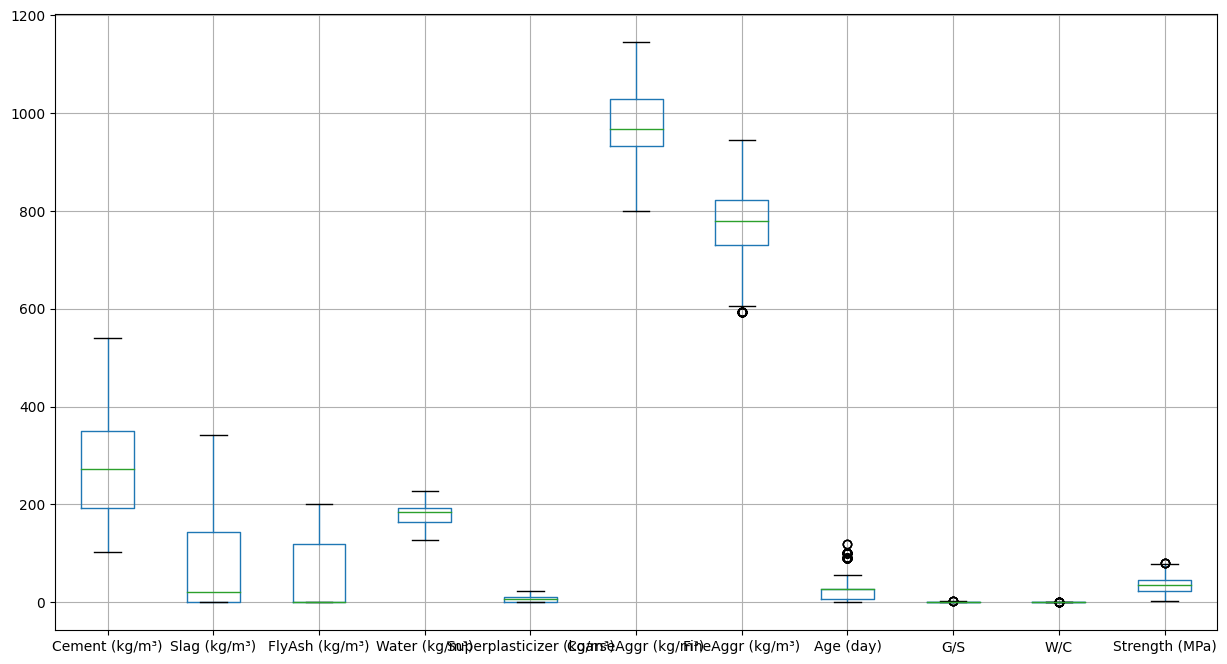

In [48]:
data.boxplot(figsize=(15,8))

# *BUILDING MODELS*